<a href="https://colab.research.google.com/github/Guidong99/Project-of-Data-Science/blob/main/833hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

## Question 2

In [ ]:
import numpy as np
from math import sqrt
import pandas as pd
from numpy import dot
from numpy import transpose as t
from matplotlib import pyplot as plt
from scipy import integrate
from math import exp
import pandas as pd

# Question 1

$x_{n+1}=x_n-λ(x_n-\frac{b+c}{2})Δt+\sqrt{λ(x_n-b)(c-x_n)}ΔW$

$ΔW\sim𝒩(0,Δt)$


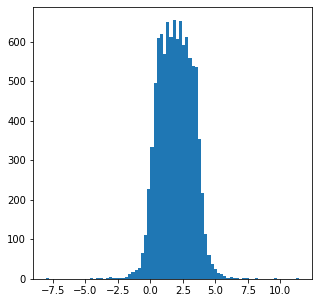

In [ ]:
dt=0.25
b=0
c=4
lam=1
x=[2]
for i in range(10000):
  u=x[-1]
  dw=np.random.normal(0,sqrt(dt))
  u=u+dt*(-lam*(u-(b+c)/2))+dw*sqrt(abs(lam*(u-b)*(c-u)))
  x.append(u)
fig=plt.figure(figsize=(5,5))
ax1=plt.subplot(1,1,1)
ax1=plt.hist(x,80)
plt.show()


# Question 3
## Section a
Model:

$u_{m+1}=u_m+(-au_m +f)Δt+σΔW=
(1-aΔt)u_m+fΔt+σΔW=Fu_n+\mathcal{F}_{m+1}+\sigma_{m+1}$

$\sigma_{m+1}\sim𝒩(0,\sigma^2Δt)$

$r=<\sigma_{m}^*\sigma_{m}>=\sigma^2Δt$

Let $a=f=1$ and $σ=0.5$.

Observation:

$v_{m+1}=u_{m+1}+\sigma_{m+1}^0$

$\sigma_{m+1}^0\sim𝒩(0,σ^0)$

$r^0=<\sigma_{m}^{0*}\sigma_{m}^0>=σ^0$

Let $σ^0=0.01$.


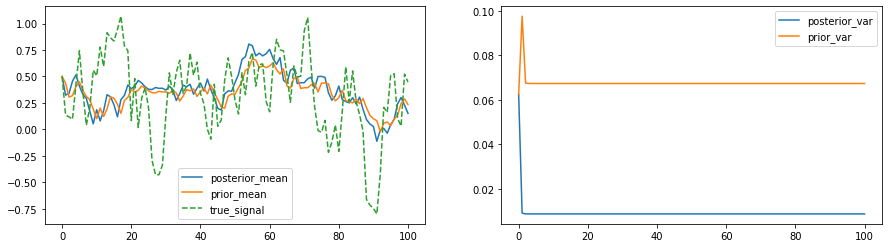

In [ ]:
dt=0.25
F=1-dt
f=dt
a,b=0.5**2*dt,0.01
U=[0.5]
R=[a]
G=1
U0=[0.5]
U1,R1=[0.5],[a]
for i in range(100):
  u=U[-1]
  u0=U0[-1]
  r=R[-1]
  np.random.seed()
  sigma=np.random.normal(0,sqrt(a))
  u0=F*u0+sigma+f*dt
  u1=F*u+f*dt
  r1=F*r*F+a
  v=G*u+np.random.normal(0,sqrt(b))
  k=r1*G/(b+G**2*r1)
  u=u1+k*(v-G*u1)
  r=(1-k*G)*r1
  U1.append(u1)
  R1.append(r1)
  U.append(u)
  R.append(r)
  U0.append(u0)

  x=pd.DataFrame()
x['true_signal']=U0
x['posterior_mean']=U
x['prior_mean']=U1

x['posterior_var']=R
x['prior_var']=R1

fig=plt.figure(figsize=(15,4))
ax1,ax2=plt.subplot(1,2,1),plt.subplot(1,2,2)


ax1.plot(x['posterior_mean'],label='posterior_mean')
ax1.plot(x['prior_mean'],label='prior_mean')
ax1.plot(x['true_signal'],label='true_signal',linestyle='--')

ax2.plot(x['posterior_var'],label='posterior_var')
ax2.plot(x['prior_var'],label='prior_var')


ax1.legend()
ax2.legend()

fig.show()

## Section b

First step:

Generating the $u_n$ by follow equations:

Model:

$u_{m+1}=u_m+(-au_m +f_m)Δt+σΔW=
(1-aΔt)u_m+f_mΔt+σ_1ΔW$

$f_{m+1}=f_m$

We can denote it as:

\begin{equation}       
\left[                 
  \begin{array}{c}   
    u_{m+1} \\  
    f_{m+1} \\  
  \end{array}
\right]=
\left[                 
  \begin{array}{cc}   
    1-aΔt &Δt\\  
    0 &1\\  
  \end{array}
\right]
\left[                 
  \begin{array}{c}   
    u_m\\  
    f_m\\  
  \end{array}
\right]+𝛔      
\end{equation}

\begin{equation}       
𝛔\sim𝒩(\left[                 
  \begin{array}{c}   
    0\\  
    0\\  
  \end{array}
\right],
\left[                 
  \begin{array}{cc}   
    0.25Δt&0\\  
    0&0\\  
  \end{array}
\right])   
\end{equation}

Observation:
\begin{equation}       
V_{m+1}=\left[                 
  \begin{array}{cc}   
    1&0\\  
    0&0\\  
  \end{array}
\right]
\left[                 
  \begin{array}{c}   
    u_m\\  
    f_m\\  
  \end{array}
\right]+𝛔^0
\end{equation}

\begin{equation}       
𝛔^0\sim𝒩(\left[                 
  \begin{array}{c}   
    0\\  
    0\\  
  \end{array}
\right],
\left[                 
  \begin{array}{cc}   
    0.01&0\\  
    0&0.01\\  
  \end{array}
\right])   
\end{equation}



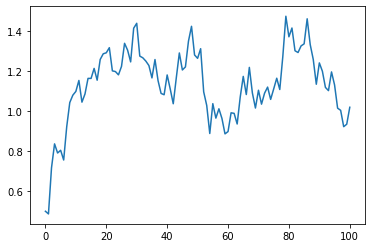

In [ ]:
dt=0.25
a=1
F=[[1-a*dt,dt],[0,1]]
U=[np.array([0.5,1])]
R=[np.array([[0,0],[0,0]])]
G=np.array([[1,0],[0,0]])
for i in range(100):
  u=U[-1]
  r=R[-1]
  np.random.seed()
  sigma=np.random.multivariate_normal([0,0],[[0.25*dt,0],[0,0]])
  u1=F@u
  r1=F@r@t(F)+[[0.25*dt,0],[0,0]]
  v=G@u+np.random.multivariate_normal([0,0],[[0.01,0],[0,0.01]])
  k=r1@t(G)@np.linalg.inv(G@r1@t(G)+[[0.01,0],[0,0.01]])
  u=u1+k@(v-G@u1)
  r=(np.identity(2)-k@G)@r1
  U.append(u)
  R.append(r)


def get_mean(lt,ind):
  s=[]
  for i in range(len(lt)):
    s.append(lt[i][ind])
  return s


u=get_mean(U,0)
plt.plot(u)

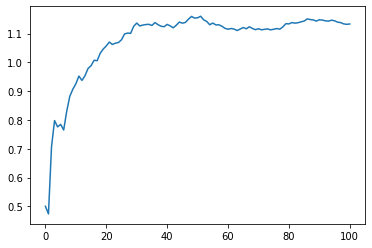

In [ ]:

dt=0.25
F,R=[0.5],[0.5]
sigma2=0.5**2
for i in range(100):
  f=F[-1]
  r=R[-1]
  f=f+(r/sigma2)*(u[i+1]-u[i]-(-u[i]+f)*dt)
  r=r-(r**2/sigma2)*dt
  F.append(f)
  R.append(r)


plt.plot(F)

## Section b



-0.016596555269738966
-0.029925811110274703
-0.15481512133385233
0.10792964605300415
-0.00861252351230879
0.026266030969598286
-0.048459128903750315
0.07428779228665411
0.03422444287324472
-0.0904096215447735
-0.02065032806410183
0.06365812224546102
0.1946097470966497
0.05241214681236506
-0.038651697245733696
-0.02142199451891591
0.017389390664138915
-0.017226475255315288
-0.07189529818124141
0.07200257827358647
-0.05841741379074028
0.016940975321405483
0.03190339088984173
-0.1510346860252409
0.02597439709444327
0.18865277458813362
-0.05492702197053689
-0.009283826174634191
-0.05017540622041117
0.1320391834803366
-0.09318802190672759
0.0366411693716423
-0.1152199563349644
0.009036802250022125
0.05105013662103586
-0.12394872438569099
0.14451531716282756
-0.11188626581681665
-0.0086413364851598
0.033007614234586646
-0.06292861096675983
0.008013369860445096
-0.12421227310058836
0.030364766031146795
-0.02957986377359273
-0.005974227380597497
-0.12102264924461933
0.003374774488942661
0.0390